# Exercise 5


1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

Your submission should be your Jupyter notebook, keep it short and concise.

In [2]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("agaricus-lepiota.data", delimiter=",")
print(df.shape)
df.describe()

(8124, 23)


,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [3]:
df[["edibility", "habitat"]].groupby("habitat").describe()
#habitat w is good

edibility                 
            count unique top  freq
habitat                           
d            3148      2   e  1880
g            2148      2   e  1408
l             832      2   p   592
m             292      2   e   256
p            1144      2   p  1008
u             368      2   p   272
w             192      1   e   192

(array([ 272.,    0.,    0.,    0.,  740.,    0.,    0.,    0., 1268.,
           0.,    0.,    0., 1008.,    0.,    0.,    0.,  592.,    0.,
           0.,   36.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

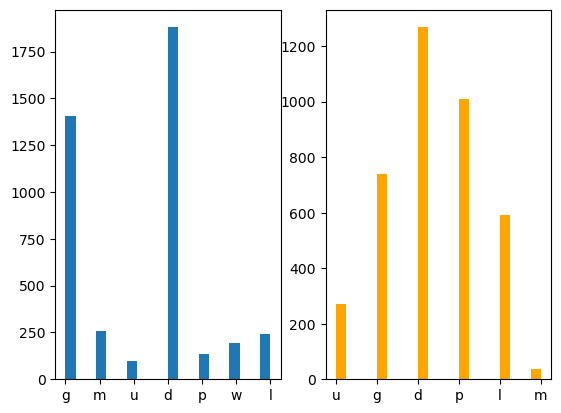

In [43]:
edible = df[df["edibility"] == 'e']
not_edible = df[df["edibility"] == 'p']


fig, axs = plt.subplots(1, 2)
axs[0].hist(edible['habitat'], bins=20)
axs[1].hist(not_edible['habitat'], bins=20, color='orange')


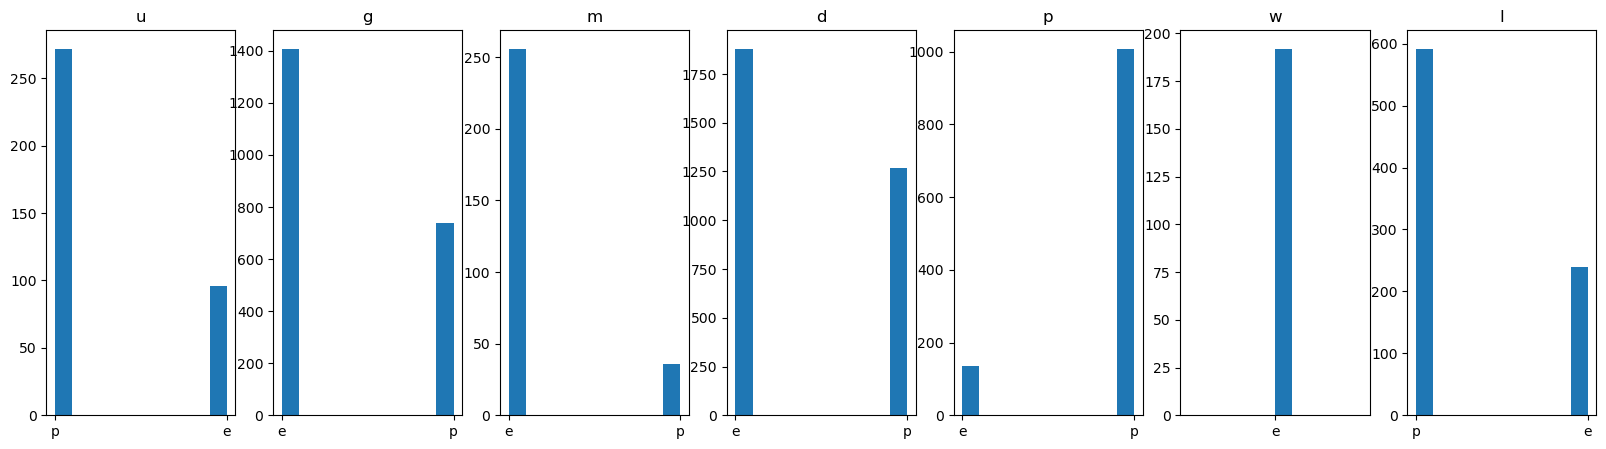

In [41]:
df[df['habitat'] == 'g']['edibility'].describe()

fig, axs = plt.subplots(1, len(df['habitat'].unique()), figsize=(20, 5))

for i, h in enumerate(df['habitat'].unique()):
    axs[i].title.set_text(h)
    axs[i].hist(df[df['habitat'] == h]['edibility'])



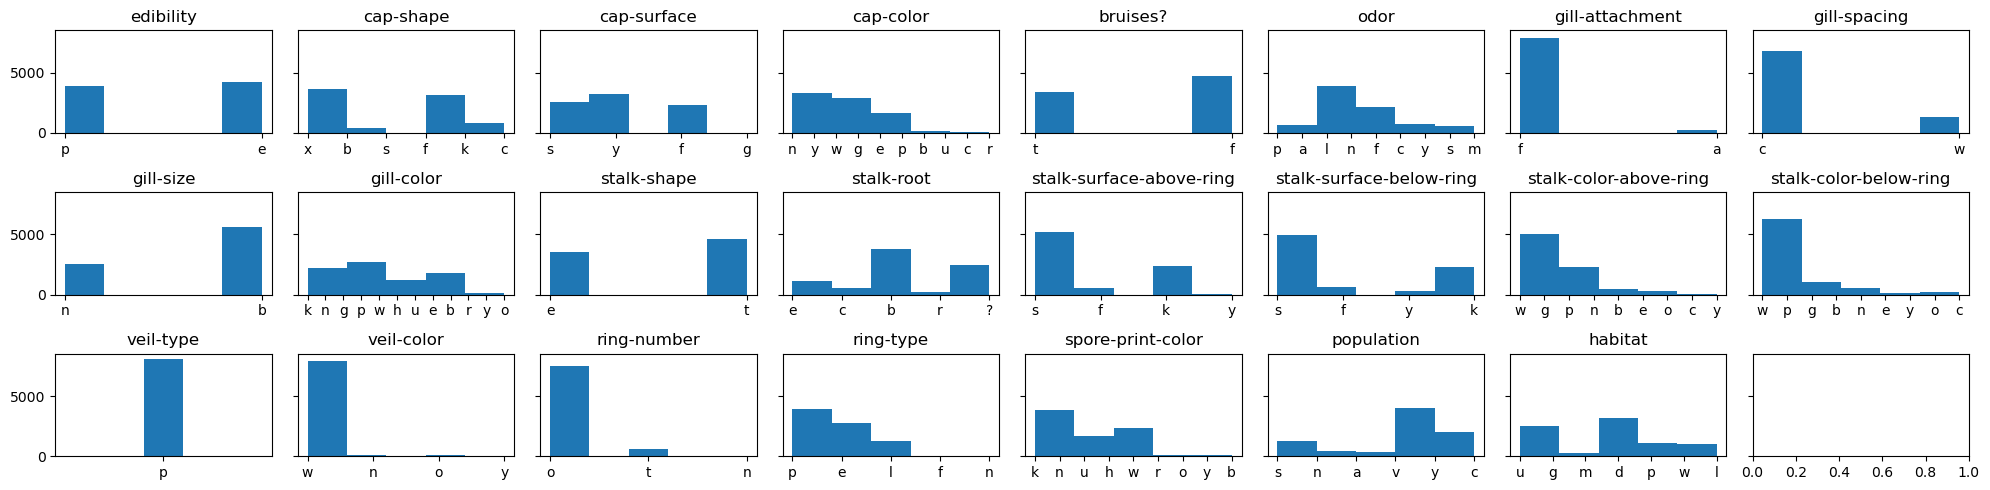

In [76]:
import math
cols = math.ceil(len(df.columns)/3)
fig, axs = plt.subplots(3, cols,sharey=True, tight_layout=True, figsize=(20,5))

for i, h in enumerate(df.columns):
    row = math.floor(i / cols)
    column = i % cols
    axs[row][column].title.set_text(h)
    axs[row][column].hist(df[h], bins=5)

In [34]:
#create dummies

df_dummy = pd.get_dummies(df)
df_dummy.describe()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.482029,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.499708,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df_dummy.drop(columns=["edibility_p","bruises?_f", 'gill-attachment_f', 'gill-size_n', 'gill-spacing_w', 'stalk-shape_e'])
df_dummy.describe()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.482029,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.499708,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


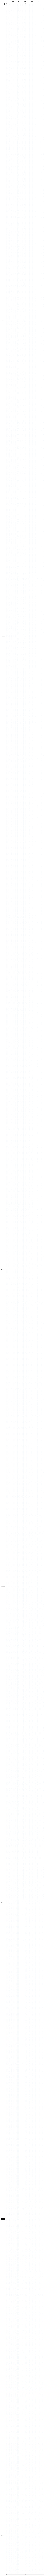

In [80]:
plt.spy(df_dummy, markersize=0.01)
fig = plt.gcf()
fig.set_size_inches(60,300)
plt.plot()
plt.show()

In [38]:
from pandas.plotting import scatter_matrix
#scatter_matrix(df_dummy[['edibility_e',"habitat_w", "habitat_d", "habitat_g", "habitat_l", "habitat_m", "habitat_p", "habitat_u"]], figsize=(8,8), diagonal='kde')